# Item-Item Recommender

In [4]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

Data from: [goodbooks-10k](https://github.com/zygmuntz/goodbooks-10k)

In [5]:
df_ratings = pd.read_csv("../data/ratings.csv")
df_ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [6]:
df_books = pd.read_csv("../data/books.csv")
df_books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


## Exploratory Data Analysis

In [4]:
df_ratings.describe()

,user_id,book_id,rating
count,5.976479e+06,5.976479e+06,5.976479e+06
mean,2.622446e+04,2.006477e+03,3.919866e+00
std,1.541323e+04,2.468499e+03,9.910868e-01
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.281300e+04,1.980000e+02,3.000000e+00
50%,2.593800e+04,8.850000e+02,4.000000e+00
75%,3.950900e+04,2.973000e+03,5.000000e+00
max,5.342400e+04,1.000000e+04,5.000000e+00


In [5]:
df_books.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [7]:
n_ratings = len(df_ratings)
n_books = df_ratings["book_id"].nunique()
n_users = df_ratings["user_id"].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique bookId's: {n_books}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per book: {round(n_ratings/n_books, 2)}")

Number of ratings: 5976479
Number of unique bookId's: 10000
Number of unique users: 53424
Average number of ratings per user: 111.87
Average number of ratings per book: 597.65


User rating counts

In [8]:
user_freq = df_ratings[['user_id', 'book_id']].groupby('user_id').count().reset_index()
user_freq.columns = ['user_id', 'n_ratings']
user_freq.head()

,user_id,n_ratings
0,1,117
1,2,65
2,3,91
3,4,134
4,5,100


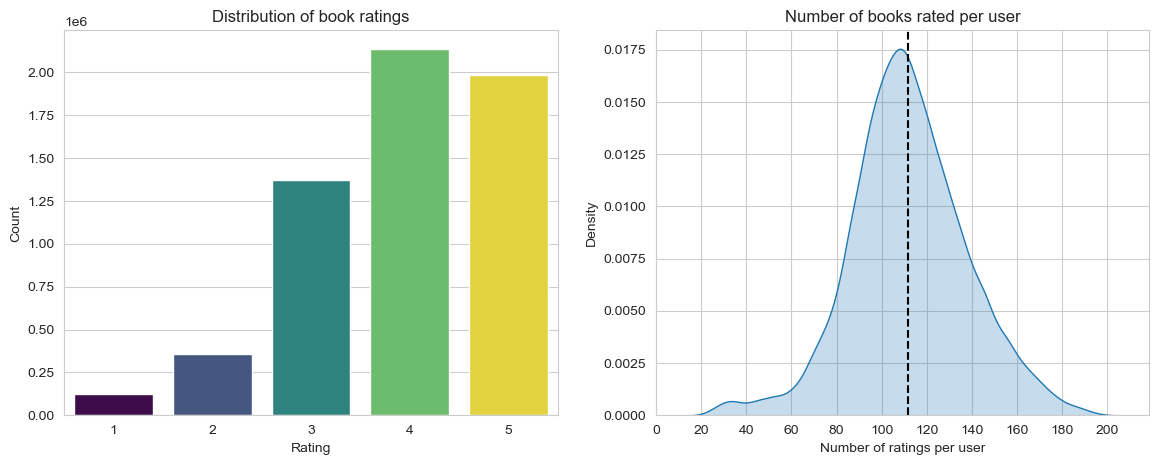

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
ax = sns.countplot(x="rating", hue="rating", data=df_ratings, palette="viridis", legend=False)
plt.title("Distribution of book ratings")
plt.xlabel("Rating")
plt.ylabel("Count")

plt.subplot(1,2,2)
ax = sns.kdeplot(user_freq['n_ratings'], fill=True, legend=False)
plt.axvline(user_freq['n_ratings'].mean(), color="k", linestyle="--")
plt.xlabel("Number of ratings per user")
plt.ylabel("Density")
plt.title("Number of books rated per user")

# X-Achse in sinnvolle Intervalle bringen (z.B. in Zehnerschritten)
ax.set_xticks(range(0, 201, 20))
plt.show()

The most common rating is 4, while ratings such as 1 and 2 are much more rare. The number of books rated per user is similar to a normal distribution.

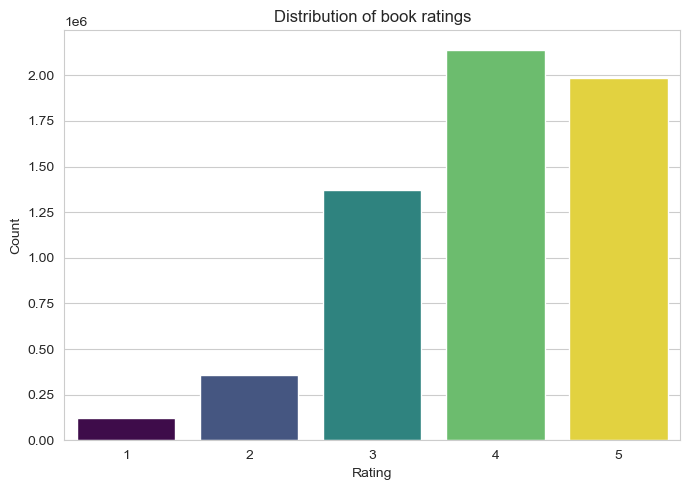

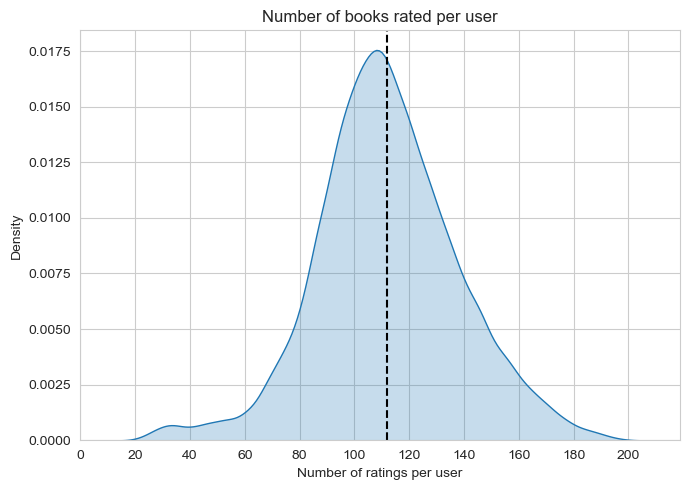

In [11]:
sns.set_style("whitegrid")

# Plot 1: Distribution of book ratings
plt.figure(figsize=(7,5))
sns.countplot(x="rating", hue="rating", data=df_ratings, palette="viridis", legend=False)
plt.title("Distribution of book ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Plot 2: Number of books rated per user
plt.figure(figsize=(7,5))
ax = sns.kdeplot(user_freq['n_ratings'], fill=True, legend=False)
plt.axvline(user_freq['n_ratings'].mean(), color="k", linestyle="--")
plt.xlabel("Number of ratings per user")
plt.ylabel("Density")
plt.title("Number of books rated per user")
ax.set_xticks(range(0, 201, 20))  # X-Achse in sinnvollen Schritten
plt.tight_layout()
plt.show()


### Which book has the lowest and highest average rating?

In [9]:
mean_rating = df_ratings.groupby('book_id')[['rating']].mean()

lowest_rated = mean_rating['rating'].idxmin()
df_books.loc[df_books['book_id'] == lowest_rated]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
1792,1793,105578,105578,101770,25,345498321,9.780345e+12,Chetan Bhagat,2005.0,One Night @ The Call Center,...,40718,44833,1244,10559,14125,11872,5177,3100,https://images.gr-assets.com/books/1320500924m...,https://images.gr-assets.com/books/1320500924s...


One Night @ The Call Center is the worst rated book.

In [10]:
df_ratings[df_ratings['book_id']==lowest_rated]

,user_id,book_id,rating
8981,401,1793,1
9183,285,1793,2
18631,714,1793,2
42099,284,1793,2
52377,1458,1793,1
...,...,...,...
5760357,43770,1793,3
5771857,49533,1793,3
5821694,43691,1793,3
5879348,52850,1793,1


One Night @ The Call Center has 295 ratings.

In [11]:
highest_rated = mean_rating['rating'].idxmax()
df_books.loc[df_books['book_id'] == highest_rated]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
3627,3628,24812,24812,25599,14,740748475,9.780741e+12,Bill Watterson,2005.0,The Complete Calvin and Hobbes,...,28900,29968,861,120,154,693,3117,25884,https://images.gr-assets.com/books/1473064526m...,https://images.gr-assets.com/books/1473064526s...


The Complete Calvin and Hobbes is the highest rated book on average, but how many ratings does it got?

In [12]:
df_ratings[df_ratings['book_id']==highest_rated]

,user_id,book_id,rating
4218,228,3628,5
11920,535,3628,5
23203,940,3628,4
26088,979,3628,5
31485,1146,3628,5
...,...,...,...
5889105,52036,3628,5
5894086,49298,3628,5
5894493,12483,3628,5
5898713,39154,3628,5


The Complete Calvin and Hobbes has 482 ratings.

Check if avergae ratings arent't influenced by amount of ratings

Text(0.5, 1.0, 'Average ratings vs. number of ratings')

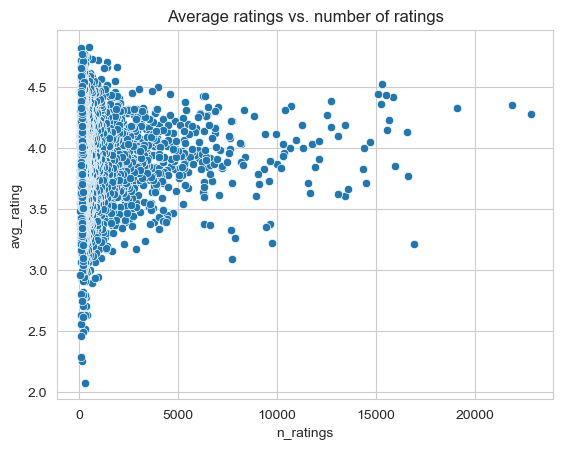

In [13]:
book_stats = df_ratings.groupby('book_id').agg(
    avg_rating=('rating', 'mean'),
    n_ratings=('rating', 'count')
)
sns.scatterplot(data=book_stats, x='n_ratings', y='avg_rating')
plt.title("Average ratings vs. number of ratings")

### Bayes Average

In [14]:
book_stats = df_ratings.groupby('book_id')[['rating']].agg(['count', 'mean'])
book_stats.columns = book_stats.columns.droplevel()

In [15]:
C = book_stats['count'].mean()
m = book_stats['mean'].mean()

def bayesian_avg(ratings):
    bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
    return bayesian_avg

bayesian_avg_ratings = df_ratings.groupby('book_id')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['book_id', 'bayesian_avg']
book_stats = book_stats.merge(bayesian_avg_ratings, on='book_id')

In [16]:
book_stats = book_stats.merge(df_books[['book_id', 'title']])
book_stats.sort_values('bayesian_avg', ascending=False).head()

,book_id,count,mean,bayesian_avg,title
24,25,15304,4.525941,4.502533,Harry Potter and the Deathly Hallows (Harry Po...
421,422,1915,4.659530,4.479617,"Harry Potter Boxset (Harry Potter, #1-7)"
861,862,1373,4.702840,4.460310,"Words of Radiance (The Stormlight Archive, #2)"
779,780,1394,4.661406,4.433867,Calvin and Hobbes
26,27,15081,4.443339,4.422748,Harry Potter and the Half-Blood Prince (Harry ...


Using the Bayesian average, we see that `Harry Potter and the Deathly Hallows`and `Harry Potter Boxset`are the most highly rated books, which makes sense.

What about worst rated books?

In [17]:
book_stats.sort_values('bayesian_avg', ascending=True).head()

,book_id,count,mean,bayesian_avg,title
33,34,7724,3.092439,3.150662,"Fifty Shades of Grey (Fifty Shades, #1)"
2,3,16931,3.214341,3.237825,"Twilight (Twilight, #1)"
48,49,9712,3.217360,3.257114,"New Moon (Twilight, #2)"
1792,1793,295,2.077966,3.299958,One Night at the Call Center
341,342,2863,3.174991,3.300741,The Casual Vacancy


With the Bayesian average `Fifty Shades of Grey`and `Twillight` are the worst rated movie instead of `One Night at the Call Center`, whiih is still in the worst Top 5.

# Transforming the data

First calculate `user-item matrix`. In this matrix, rows represent user and columens represent items.

The `create_X()` function outputs a sparse matrix X with four mapper dictionaries:

- **user_mapper**: maps user id to user index
- **book_mapper**: maps book id to book index
- **user_inv_mapper**: maps user index to user id
- **book_inv_mapper**: maps book index to book id

We need these dictionaries because they map which row and column of the utility matrix corresponds to which user ID and book ID, respectively.

The X (user-item) matrix is a scipy.sparse.csr_matrix which stores the data sparsely.

In [3]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        book_mapper: dict that maps book id's to book indices
        book_inv_mapper: dict that maps book indices to book id's
    """
    N = df['user_id'].nunique()
    M = df['book_id'].nunique()

    user_mapper = dict(zip(np.unique(df["user_id"]), list(range(N))))
    book_mapper = dict(zip(np.unique(df["book_id"]), list(range(M))))
    
    user_inv_mapper = dict(zip(list(range(N)), np.unique(df["user_id"])))
    book_inv_mapper = dict(zip(list(range(M)), np.unique(df["book_id"])))
    
    user_index = [user_mapper[i] for i in df['user_id']]
    book_index = [book_mapper[i] for i in df['book_id']]

    X = csr_matrix((df["rating"], (book_index, user_index)), shape=(M, N))
    
    return X, user_mapper, book_mapper, user_inv_mapper, book_inv_mapper

In [9]:
X, user_mapper, book_mapper, user_inv_mapper, book_inv_mapper = create_X(df_ratings)

Inspect sparsity of the X matrix. 
Calculate sparsity of matrix as follows:
 $\text{S} = \frac{\text{count of non-zero elements}}{\text{total elements}}$

In [10]:
sparsity = X.count_nonzero()/(X.shape[0]*X.shape[1])
print(f"Matrix sparsity: {sparsity: .2%}")

Matrix sparsity:  1.12%


Only 1.2% of our user-item matrix is populated with ratings. Since the sparsity > 0.5% that's fine and makes the matrix useful for collaborative filtering.

### Write matric to a file

In [21]:
from scipy.sparse import save_npz

save_npz('../data/user_item_matrix.npz', X)

# Find similar books using k-Nearest Neighbours

This approach looks for the k-nearest neighbours of a given book by identifying k points in the dataset that are closest to movie m.

In [4]:
from sklearn.neighbors import NearestNeighbors

def find_similar_books(book_id, X, k, metric='cosine', show_distance=False):
    """
    Finds k-nearest neighbours for a given book id.
    
    Args:
        book_id: id of the book of interest
        X: user-item utility matrix
        k: number of similar books to retrieve
        metric: distance metric for kNN calculations
    
    Returns:
        list of k similar book ID's
    """
    neighbour_ids = []

    book_ind = book_mapper[book_id]
    book_vec = X[book_ind]
    # the item itself is counted as neighbour, hence +1
    k+=1
    kNN = NearestNeighbors(n_neighbors=k, algorithm='brute', metric=metric)
    kNN.fit(X)
    
    if isinstance(book_vec, (np.ndarray)):
        book_vec = book_vec.reshape(1, -1) # TODO 
    neighbour = kNN.kneighbors(book_vec, return_distance=show_distance)

    for i in range(0, k):
        n = neighbour.item(i)
        neighbour_ids.append(book_inv_mapper[n])
        
    # pop the item it self
    neighbour_ids.pop(0)
    return neighbour_ids

## Get recommendations

In [15]:
book_titles = dict(zip(df_books['book_id'], df_books['title']))

book_id = 11

similar_ids = find_similar_books(book_id=book_id, X=X, k=10)
book_title = book_titles[book_id]

print(f"Because you read {book_title}")
for i in similar_ids:
    print(book_titles[i])

Because you read The Kite Runner
A Thousand Splendid Suns
Memoirs of a Geisha
The Secret Life of Bees
Water for Elephants
The Help
The Lovely Bones
To Kill a Mockingbird
Life of Pi
The Girl with the Dragon Tattoo (Millennium, #1)
The Time Traveler's Wife


Try another distance metric

In [14]:
book_titles = dict(zip(df_books['book_id'], df_books['title']))

book_id = 11

similar_ids = find_similar_books(book_id=book_id, X=X, k=10, metric='euclidean')
book_title = book_titles[book_id]

print(f"Because you read {book_title}")
for i in similar_ids:
    print(book_titles[i])

Because you read The Kite Runner
A Thousand Splendid Suns
The Secret Life of Bees
The Memory Keeper's Daughter
The Poisonwood Bible
The Red Tent
Snow Flower and the Secret Fan
Eat, Pray, Love
The Glass Castle
The Lovely Bones
Three Cups of Tea: One Man's Mission to Promote Peace ... One School at a Time
